In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Set plot style
sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

try:
    from google.colab import files
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]
except:
    file_name = "data_of_Canada_new.csv"

Saving data_of_Canada_new.csv to data_of_Canada_new.csv


In [5]:
df = pd.read_csv(file_name)
df

,Country,ISO Code,Continent,Region,DevName,1980,1981,1982,1983,1984,...,2017,2018,2019,2020,2021,2022,2023,2024,Total,July - 2024
0,Total,TOT,World,NaN,NaN,143135.0,128618.0,121147.0,89157.0,88239.0,...,286535,321055,341175,184600,406050,437625,471815,485000,10684930,303640
1,India,IND,Asia,Southern Asia,Developing regions,8880.0,8670.0,8147.0,7338.0,5704.0,...,51590,69985,85590,42875,127945,118250,139785,138732,1584226,86855
2,Philippines,PHL,Asia,South-Eastern Asia,Developing regions,6051.0,5921.0,5249.0,4562.0,3801.0,...,40905,35050,27820,10975,18020,22095,26965,32976,858925,20645
3,China,CHN,Asia,Eastern Asia,Developing regions,5123.0,6682.0,3308.0,1863.0,1527.0,...,30250,29710,30245,16525,31010,31845,31780,30436,962707,19055
4,Nigeria,NGA,Africa,Western Africa,Developing regions,81.0,60.0,58.0,58.0,78.0,...,5445,10920,12600,6360,15595,22130,17465,19615,162570,12280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Qatar,QAT,Asia,Western Asia,Developing regions,0.0,0.0,0.0,0.0,0.0,...,0,0,0,5,0,5,0,0,176,0
189,Samoa,WSM,Oceania,Polynesia,Developing regions,3.0,7.0,4.0,1.0,3.0,...,0,0,0,0,0,0,0,0,83,0
190,San Marino,SMR,Europe,Southern Europe,Developed regions,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,5,0
191,Sao Tome and Principe,STP,Africa,Middle Africa,Developing regions,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,11,0


In [10]:
# Define list of countries in conflict
conflict_countries = ["India", "Samoa", "Ukraine", "China"]

# Use filter and lambda methods to filter data
df_conflict = df[df.apply(lambda row: row["Country"] in conflict_countries, axis=1)]

# Create a list of years as columns
years = list(map(str, range(1980, 2025)))

# Get the "Country" column and the year columns
df_conflict = df_conflict[["Country"] + years]

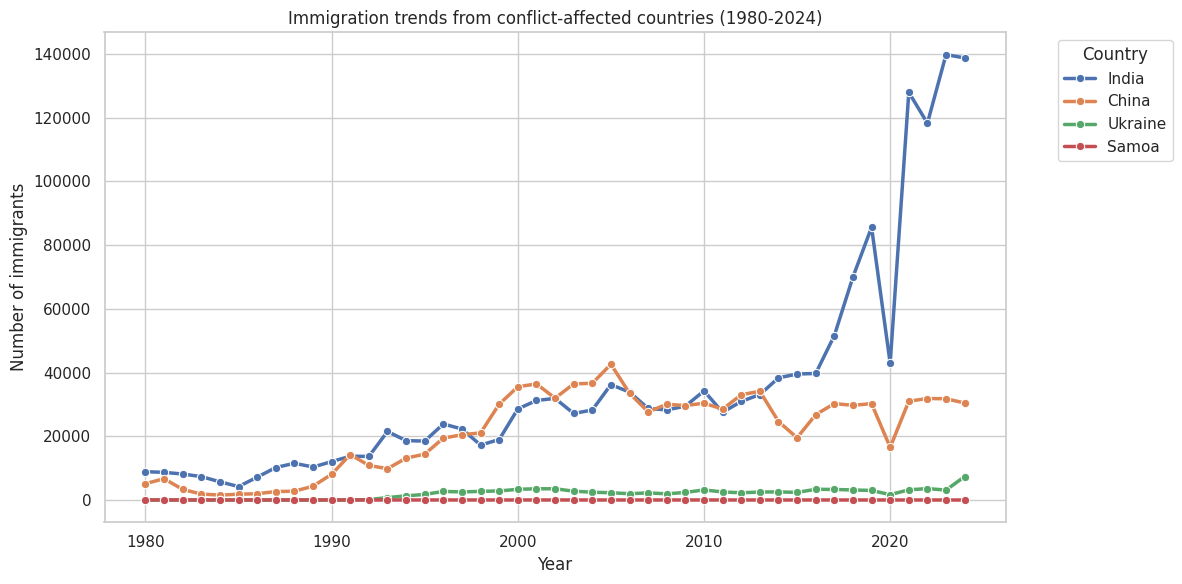

In [11]:
# Convert DataFrame to be compatible with Seaborn
df_conflict_melted = pd.DataFrame({
    "Country": df_conflict["Country"].repeat(len(years)),
    "Year": years * len(df_conflict),
    "Immigrants": df_conflict[years].values.flatten()
})

# Convert the data type of the "Year" column
df_conflict_melted["Year"] = df_conflict_melted["Year"].astype(int)

# Set up styling for Seaborn
sns.set(style="whitegrid")

# Create line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_conflict_melted, x="Year", y="Immigrants", hue="Country", marker="o", linewidth=2.5)

# Customize chart
plt.xlabel("Year")
plt.ylabel("Number of immigrants")
plt.title("Immigration trends from conflict-affected countries (1980-2024)")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


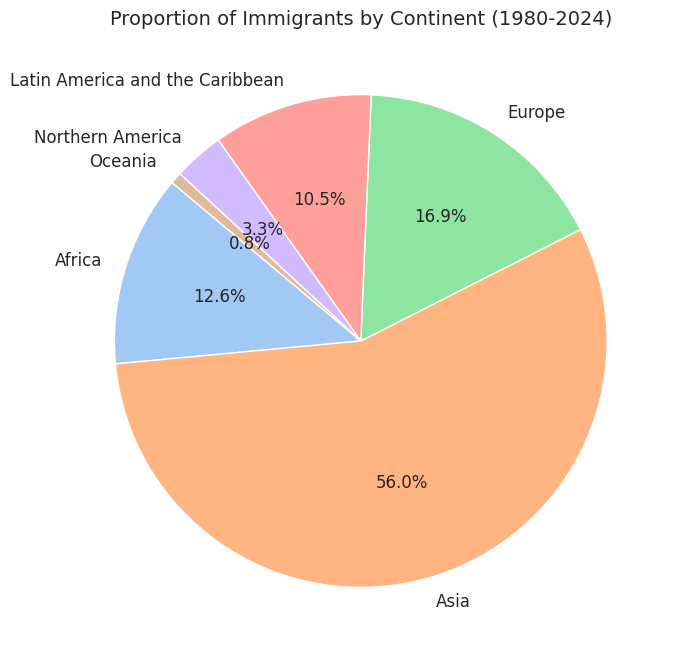

In [12]:
# Remove 'World' row if it exists
df = df.query("Continent != 'World'")

# Summing up the total number of immigrants per continent
df_continent = df.groupby("Continent").agg('sum', numeric_only=True)

# Compute total immigration per continent
df_continent["Total"] = df_continent.iloc[:, 3:].sum(axis=1)

# Prepare data for pie chart
labels = df_continent.index.tolist()
sizes = df_continent["Total"].tolist()

# Set Seaborn style
sns.set_style("whitegrid")

# Create a pie chart
plt.figure(figsize=(12, 8))
colors = sns.color_palette("pastel", n_colors=len(labels))  # Using Seaborn pastel color palette
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, textprops={'fontsize': 12})
plt.title("Proportion of Immigrants by Continent (1980-2024)", fontsize=14)
plt.show()
